In [1]:
import mglearn
import numpy as np

c:\Users\eshub\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\decomposition\_nmf.py:1692: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


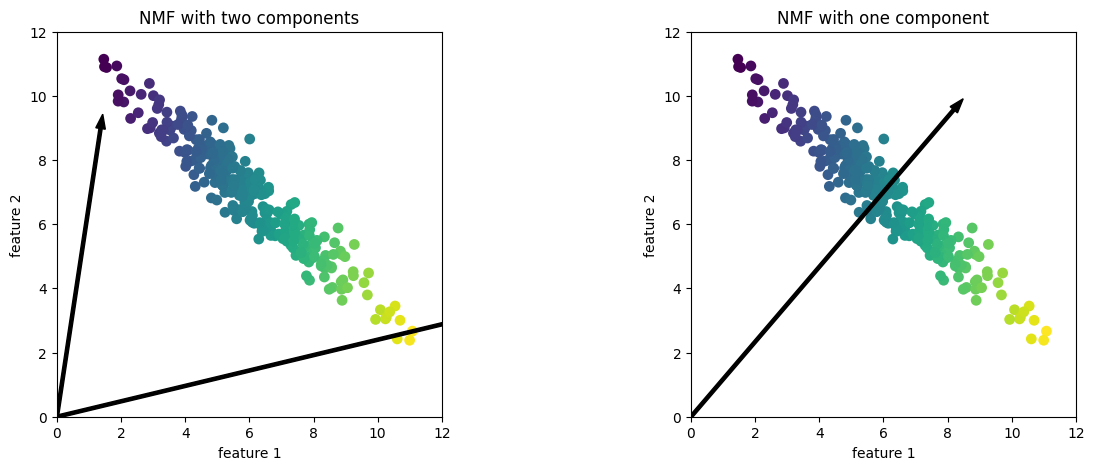

In [2]:
mglearn.plots.plot_nmf_illustration()

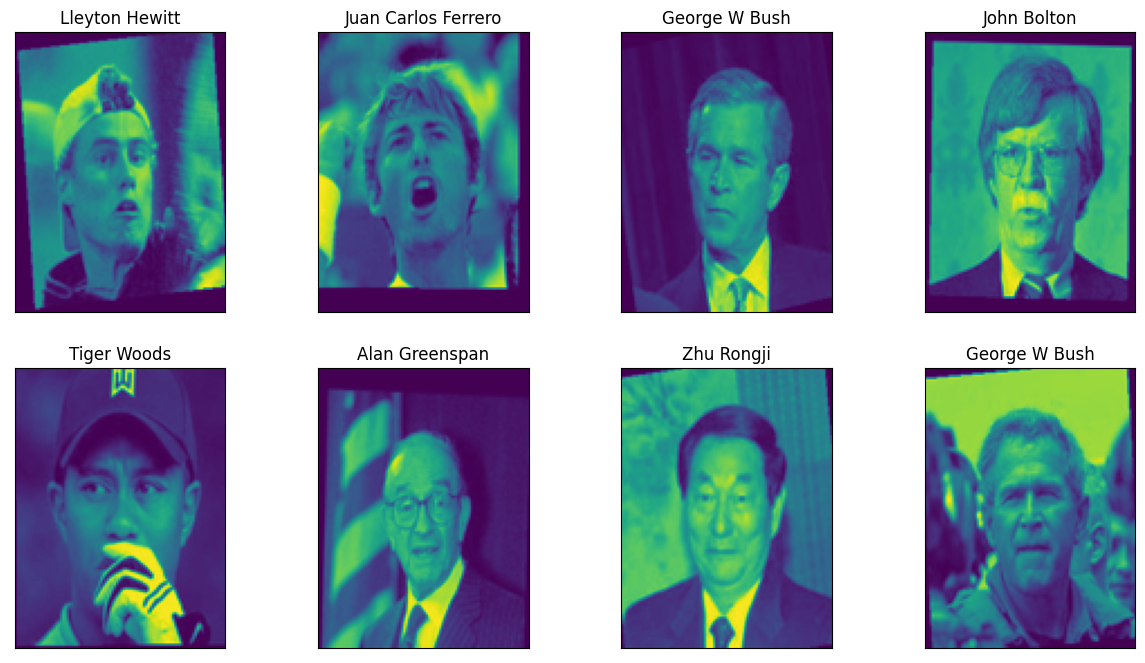

In [3]:
from sklearn.datasets import fetch_lfw_people
import matplotlib.pyplot as plt

people = fetch_lfw_people(min_faces_per_person=3, resize=1)
image_shape = people.images[0].shape
fix, axes = plt.subplots(2, 4, figsize=(15, 8), subplot_kw={
                         'xticks': (), 'yticks': ()})
for target, image, ax in zip(people.target, people.images, axes.ravel()):
    ax.imshow(image)
    ax.set_title(people.target_names[target])


In [4]:
# Making an array of zeros of size people.target and type boolean
mask = np.zeros(people.target.shape, dtype=np.bool)
for target in np.unique(people.target):
    # Taking 50 images of each person
    mask[np.where(people.target == target)[0][:50]] = 1

x_people = people.data[mask]
y_people = people.target[mask]

# Dividing by 255 so that each value lies between 0 and 1
x_people = x_people / 255
print(x_people)


C:\Users\eshub\AppData\Local\Temp\ipykernel_10384\4027912494.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros(people.target.shape, dtype=np.bool)


[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.00017942 0.00020505 0.00018967 ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.00020505 0.00023581 0.00026656 ... 0.00066128 0.00066128 0.00069204]
 [0.00196335 0.0030091  0.00293221 ... 0.00026144 0.00034858 0.00050237]
 [0.         0.         0.         ... 0.0032039  0.00143535 0.00139946]]


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
x_train, x_test, y_train, y_test = train_test_split(
    x_people, y_people, stratify=y_people, random_state=0)


c:\Users\eshub\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\decomposition\_nmf.py:1692: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


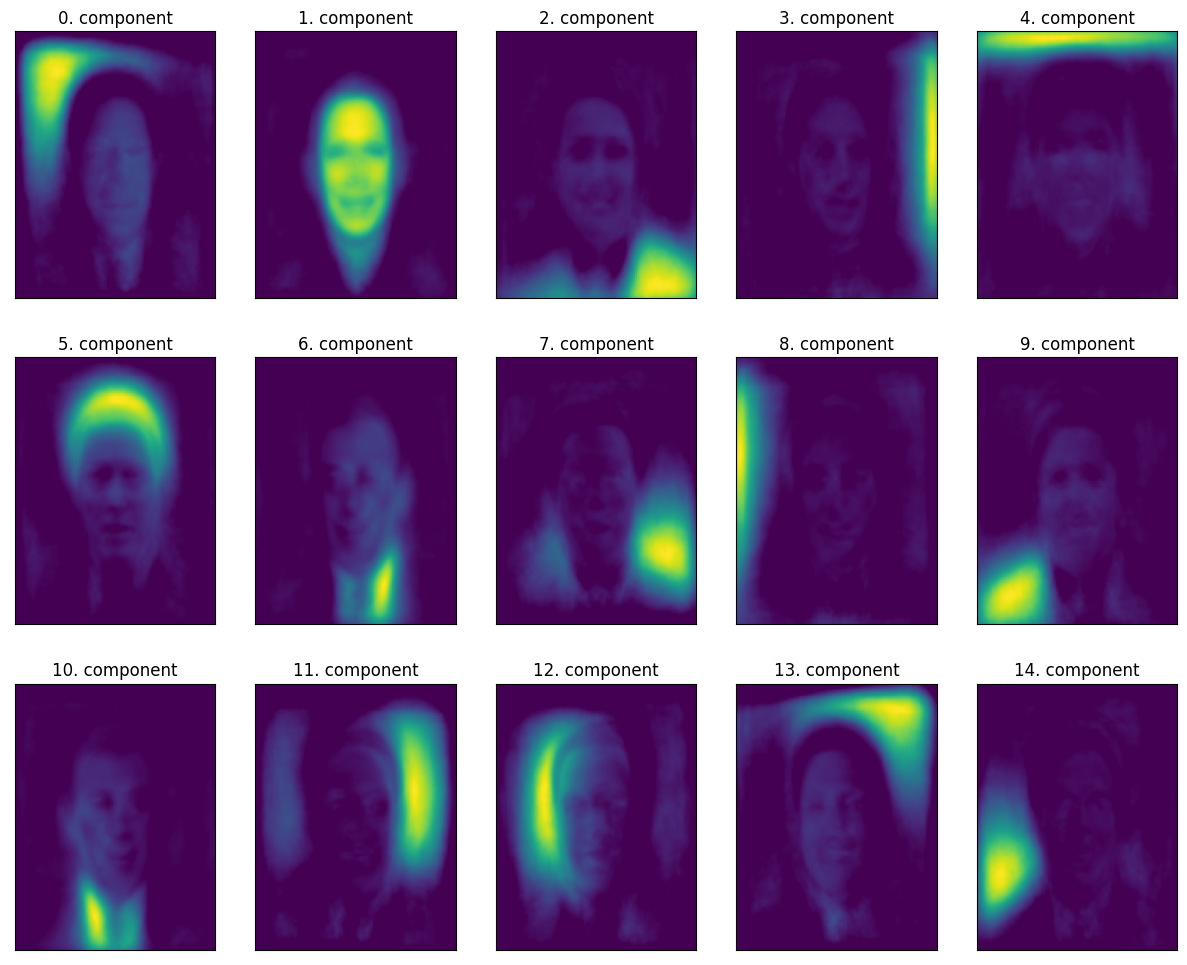

In [6]:
from sklearn.decomposition import NMF
nmf = NMF(n_components=15, random_state=0)
nmf.fit(x_train)
X_train_nmf = nmf.transform(x_train)
X_test_nmf = nmf.transform(x_test)

# subplot_kw tells the way in which the projection will take place 'xticks':() will remove the x-axis reading from the image
fix, axes = plt.subplots(3, 5, figsize=(15, 12), subplot_kw={
                         "xticks": (), "yticks": ()})

for i, (component, ax) in enumerate(zip(nmf.components_, axes.ravel())):
    ax.imshow(component.reshape(image_shape))
    ax.set_title("{}. component".format(i))


Like we saw in the previous plot, component 3 and component 6 are the faces which are looking towards right and left respectively. Hence, by considering only these components from images we can see the faces that are actually looking towards right and left. 
The faces which are matching with the components the most, are plotted first since we sorted the indices in the reverse order. 

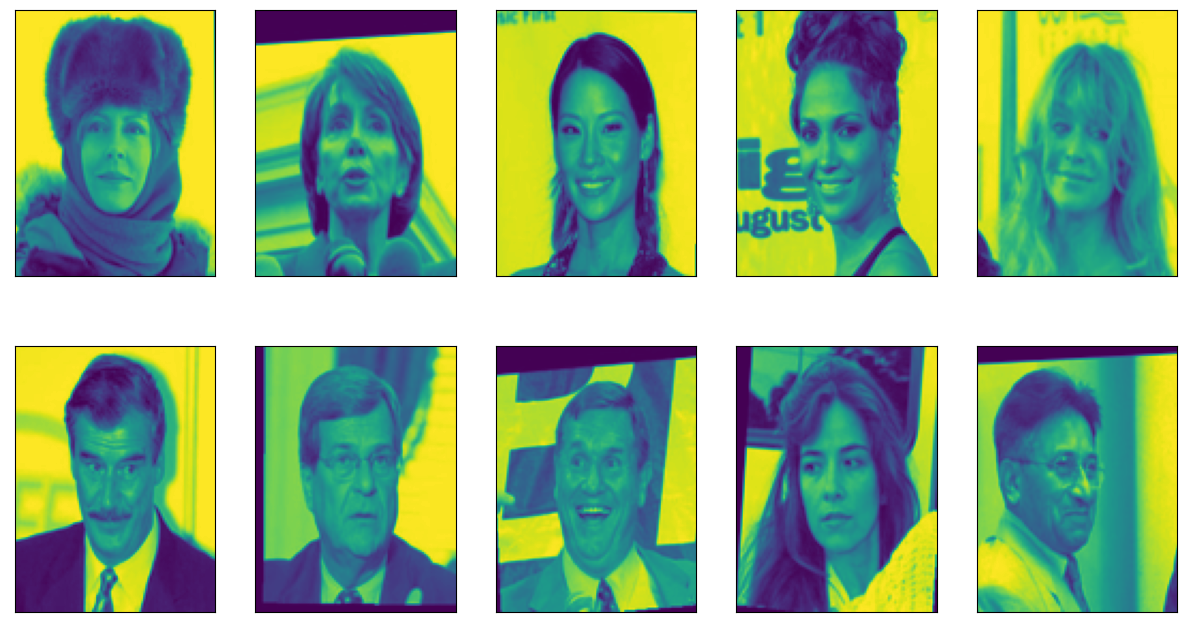

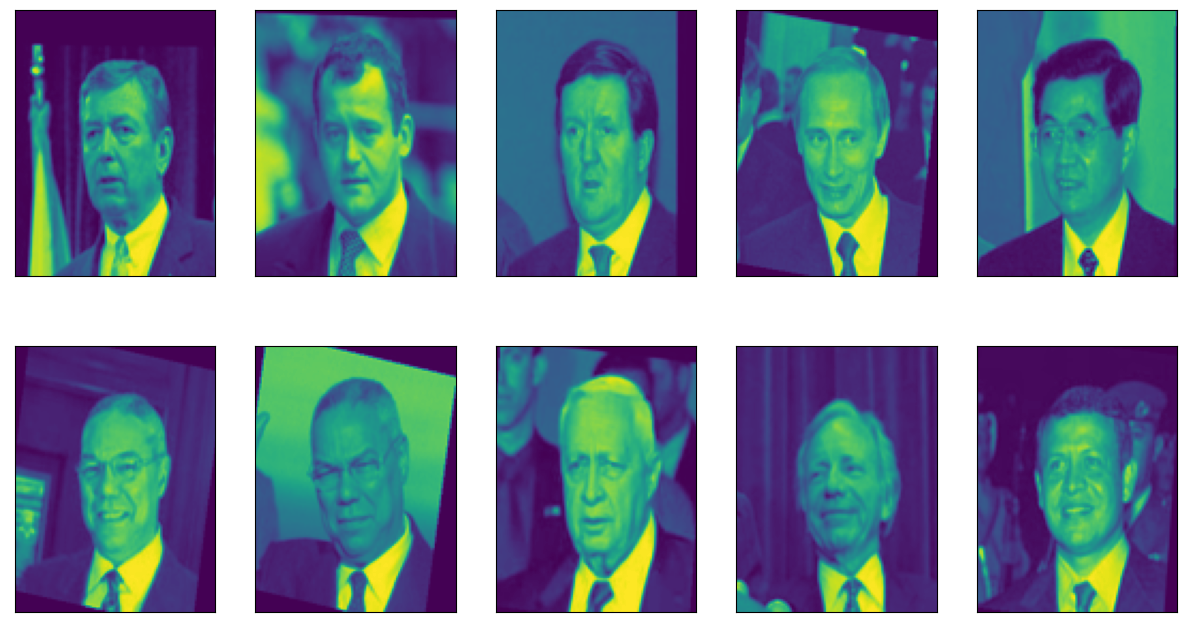

In [7]:


compn = 3   #Looking towards right
inds = np.argsort(X_train_nmf[:, compn])[::-1]  # Sort the array and reverse it
# subplot_kw tells the way in which the projection will take place 'xticks':() will remove the x-axis reading from the image
fig, axes = plt.subplots(2, 5, figsize=(15, 8), subplot_kw={
                         'xticks': (), 'yticks': ()})
for i, (ind, ax) in enumerate(zip(inds, axes.ravel())):
    # imshow() is used to display the images
    ax.imshow(x_train[ind].reshape(image_shape))

compn = 6   # Looking towards left 
inds = np.argsort(X_train_nmf[:, compn])[::-1]
fig, axes = plt.subplots(2, 5, figsize=(15, 8), subplot_kw={
                         'xticks': (), 'yticks': ()})
for i, (ind, ax) in enumerate(zip(inds, axes.ravel())):
    ax.imshow(x_train[ind].reshape(image_shape))


### Applying NMF on signals 

Text(0, 0.5, 'Signal')

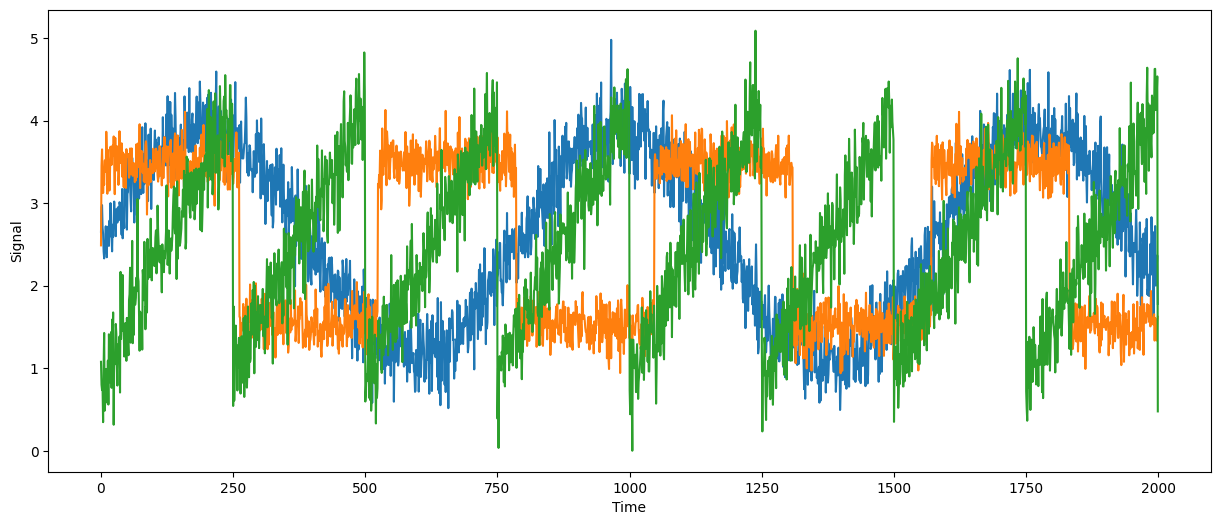

In [8]:
# Let us extract the make_signals() data from the dataset

from mglearn.datasets import make_signals
s = make_signals()
plt.figure(figsize=(15, 6))
plt.plot(s, '-')
plt.xlabel("Time")
plt.ylabel("Signal")

In [9]:
# Divide the data into 100 dimensions in order to obtain a series of measurements on the plot

a = np.random.RandomState(0).uniform(size=(100, 3)) # Randomly generates the data of 3 plots into 100 dimensions
x = np.dot(s, a.T)  # Dot product of 2 arrays namely s and the transpose of the array a
print("Shape of the data is {}".format(x.shape))

Shape of the data is (2000, 100)


In [10]:
nmf = NMF(n_components=3, random_state=0)   # Dividing 100 dimensions into just 3 components using NMF
S_ = nmf.fit_transform(x)
print("New shape of the data {}".format(S_.shape))

New shape of the data (2000, 3)


In [11]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3, random_state=0)   #Dividing 100 dimensions into 3 components using PCA
H = pca.fit_transform(x)
print("Shape using PCA {}".format(H.shape))


Shape using PCA (2000, 3)


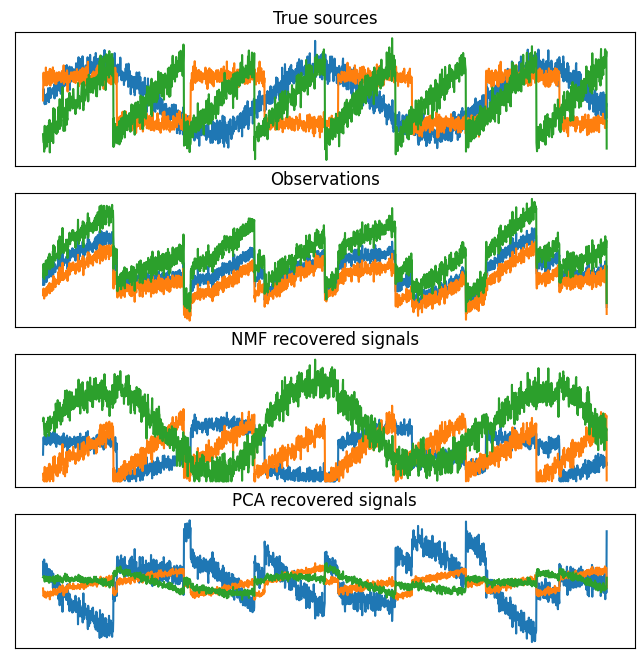

In [12]:
# Plotting the original data along with the decomposed models using NMF and PCA

models = [s, x, S_, H]
names = ["True sources", "Observations", "NMF recovered signals", "PCA recovered signals"]

fig, axes = plt.subplots(4, 1, figsize=(8, 8), subplot_kw={"xticks": (), "yticks": ()})

for model, name, ax in zip(models, names, axes):
    ax.set_title(name)
    ax.plot(model[:, :3], '-')          # Plotting the model for the 3 signals